# Introduction to QuTiP
Refer to https://qutip.org/index.html for tutorials and docs

In [15]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz, sigmax, mesolve

%matplotlib inline

### Some Basic QuTiP functions

In [17]:
basis(2, 0) # standard basis

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [18]:
qt.qeye(3) # identity

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [19]:
qt.destroy(3) # annihilation operator (aka ladder/bosonic operators)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]

### Example 1 - Larmor Precession

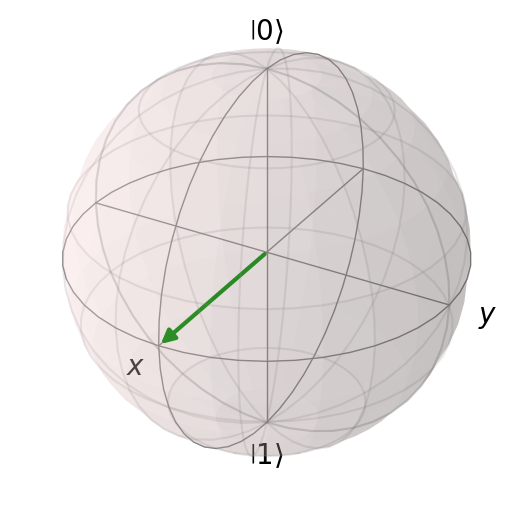

In [20]:
# Initial State
psi0 = (basis(2, 0) + basis(2, 1)).unit() # unit() normalizes the quantum object

# Visualizing the state using Bloch sphere
b = Bloch()
b.add_states(psi0)
b.show()

In [21]:
# Hamiltonian
H = sigmaz()

# Time Evolution 
times = np.linspace(0, 10, 100)
result = sesolve(H, psi0, times, e_ops=[sigmay(), sigmax(), sigmaz()])

sesolve() function solves the Schrondinger Equation for the given Hamiltonian, initial state and time and calculates the expectation values of the given operators (e_ops) at each point in time. It essentially simulates time evolution.

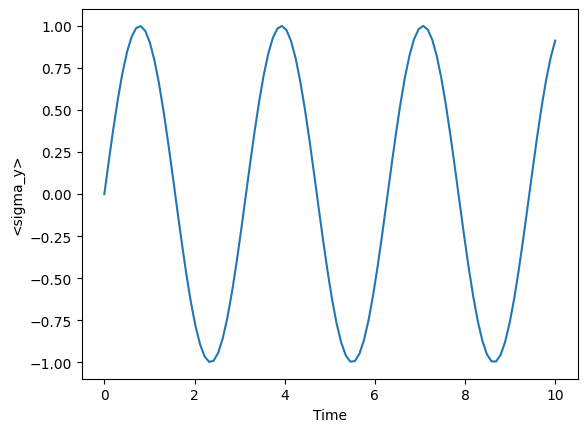

In [22]:
# Plotting expectation value of sigma_y with time
plt.plot(times, result.expect[0])
plt.xlabel("Time"), plt.ylabel("<sigma_y>")
plt.show()

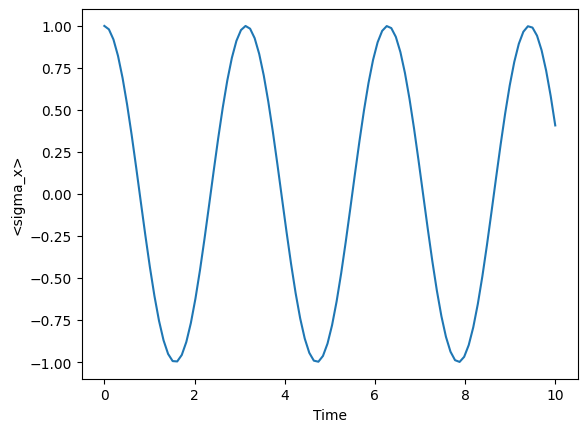

In [23]:
# Plotting expectation value of sigma_x with time
plt.plot(times, result.expect[1])
plt.xlabel("Time"), plt.ylabel("<sigma_x>")
plt.show()

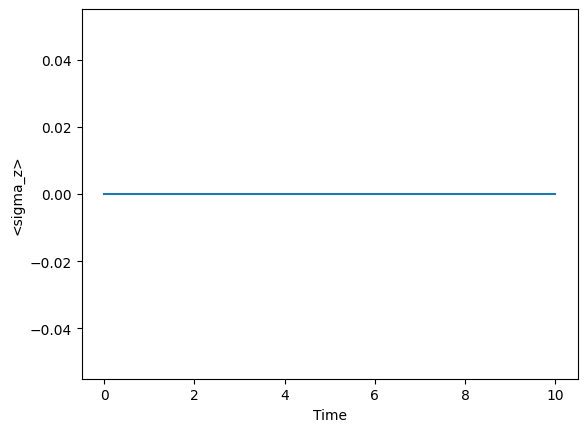

In [24]:
# Plotting expectation value of sigma_z with time
plt.plot(times, result.expect[2])
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.show()

### Example 2 - Harmonic Oscillator Energy Levels

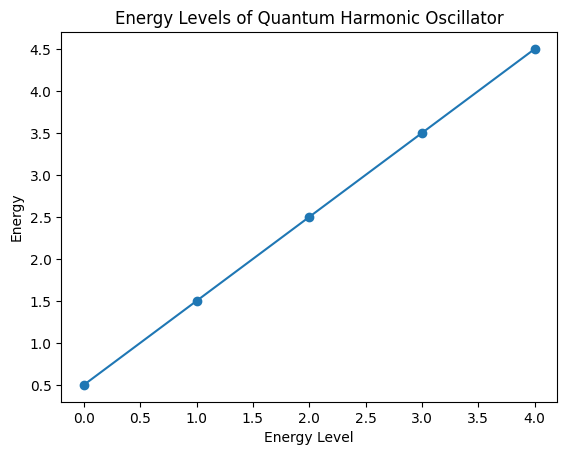

In [25]:
# Oscillator Frequency
omega = 1.0 

# Hamiltonian
H = omega * (qt.destroy(5).dag() * qt.destroy(5) + 0.5 * qt.qeye(5))

# Finding eigenvalues and eigenstates
energies, states = H.eigenstates() # returns both eigenvalues and eigenstates

# Plotting eigenvalues of Hamiltonian
plt.plot(range(len(energies)), energies, marker='o', linestyle='-')
plt.xlabel('Energy Level')
plt.ylabel('Energy')
plt.title('Energy Levels of Quantum Harmonic Oscillator')
plt.show()

Theoretically we find that the energy levels of the harmonic oscillator are equally spaced starting at $\frac{1}{2}\hbar\omega$ with gaps of $\hbar\omega$.<br />
In our example, we have taken $\hbar\omega = 1$ which means our energy levels should start at 0.5 with gaps 1 which is exactly what we see.